In [1]:
from n2v.models import N2V
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.image import imread, imsave
from csbdeep.io import save_tiff_imagej_compatible

(796, 796)


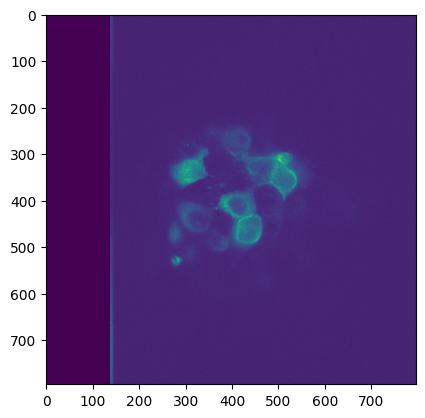

In [36]:

from n2v.internals.N2V_DataGenerator import N2V_DataGenerator

datagen = N2V_DataGenerator()
img = datagen.load_imgs_from_directory(directory="./../domes/", filter='*processed.tif', dims='ZYX')

print(img[0][0, 100, :, :, 0].shape)


plt.imshow(img[0][0, 100, :, :, 0])


In [2]:
model_name = '2d_images_from_stack'
basedir = 'models_test'
model = N2V(config=None, name=model_name, basedir=basedir)

Loading network weights from 'weights_best.h5'.


1/1 [==============================] - 3s 3s/step


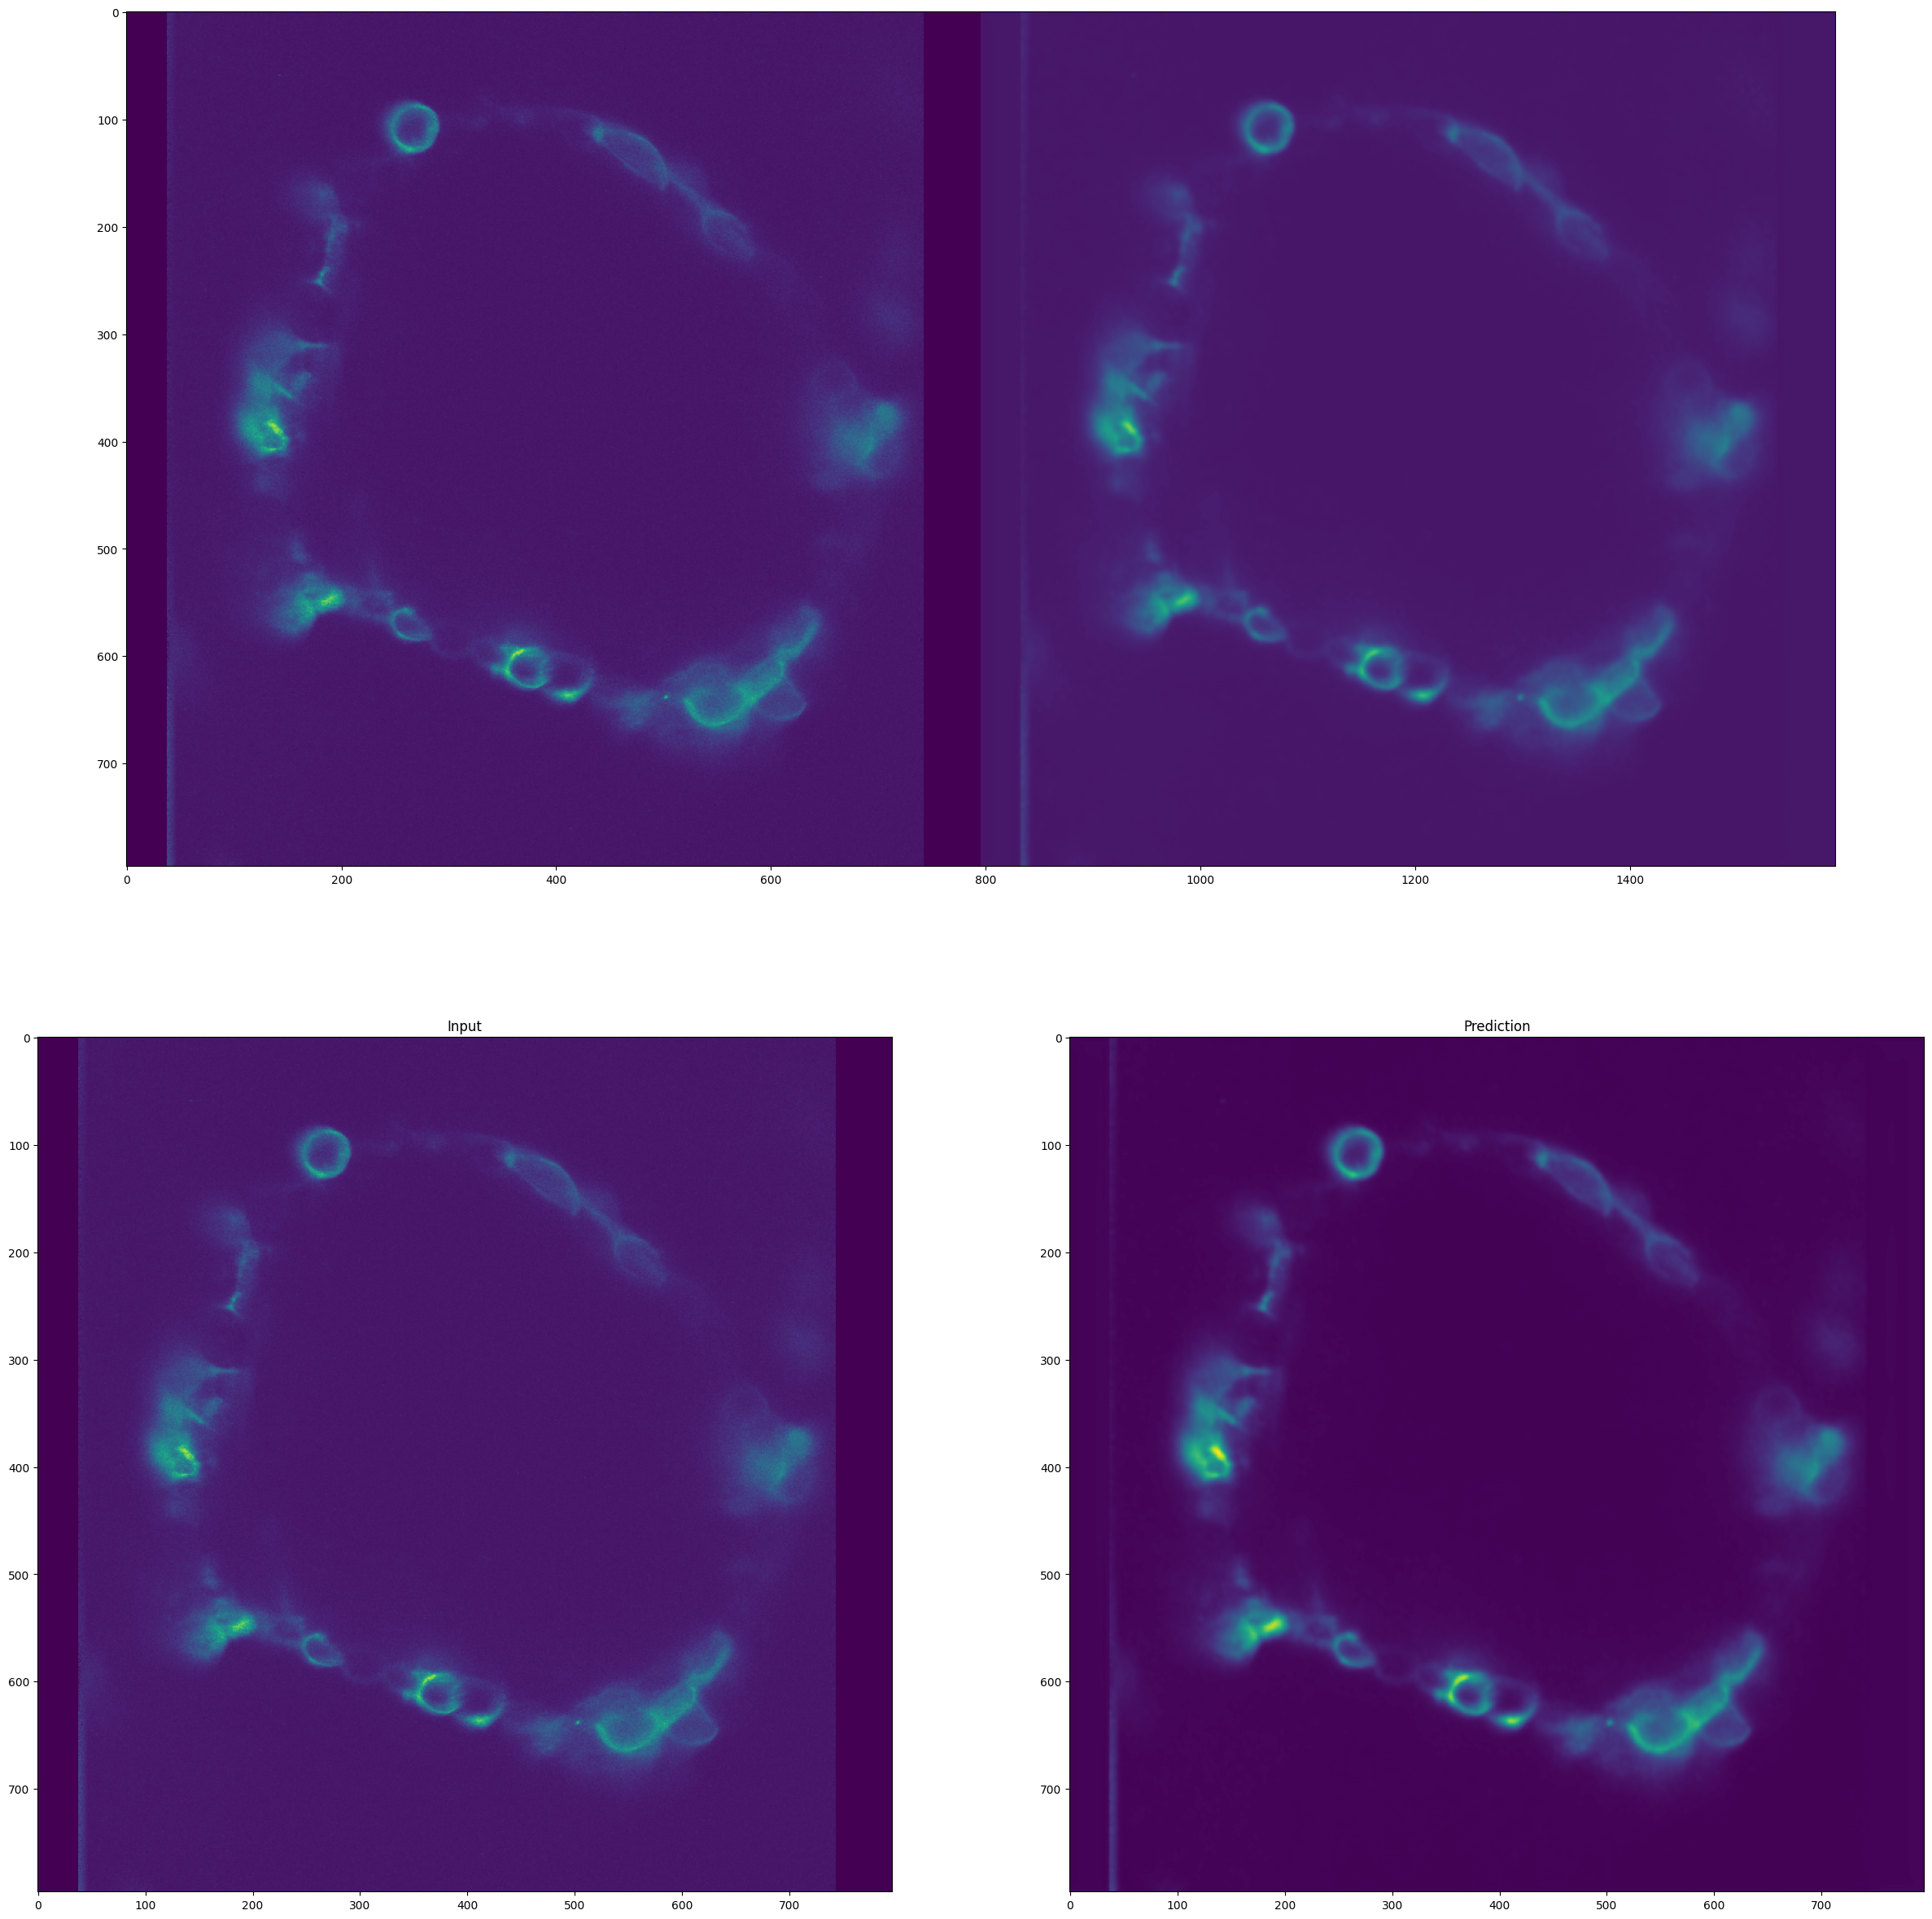

In [30]:
# Here we process the image.
image = img[0][0, 200, :, :, 0]

pred = model.predict(image, axes='YX')

plt.figure(figsize=(30,30))


plt.subplot(2,1,1)
plt.imshow(np.hstack((image, pred)))

# We show the noisy input...
plt.subplot(2,2,3)
plt.imshow( image )
plt.title('Input');

# and the result.
plt.subplot(2,2,4)
plt.imshow( pred )
plt.title('Prediction');

1/1 [==============================] - 2s 2s/step


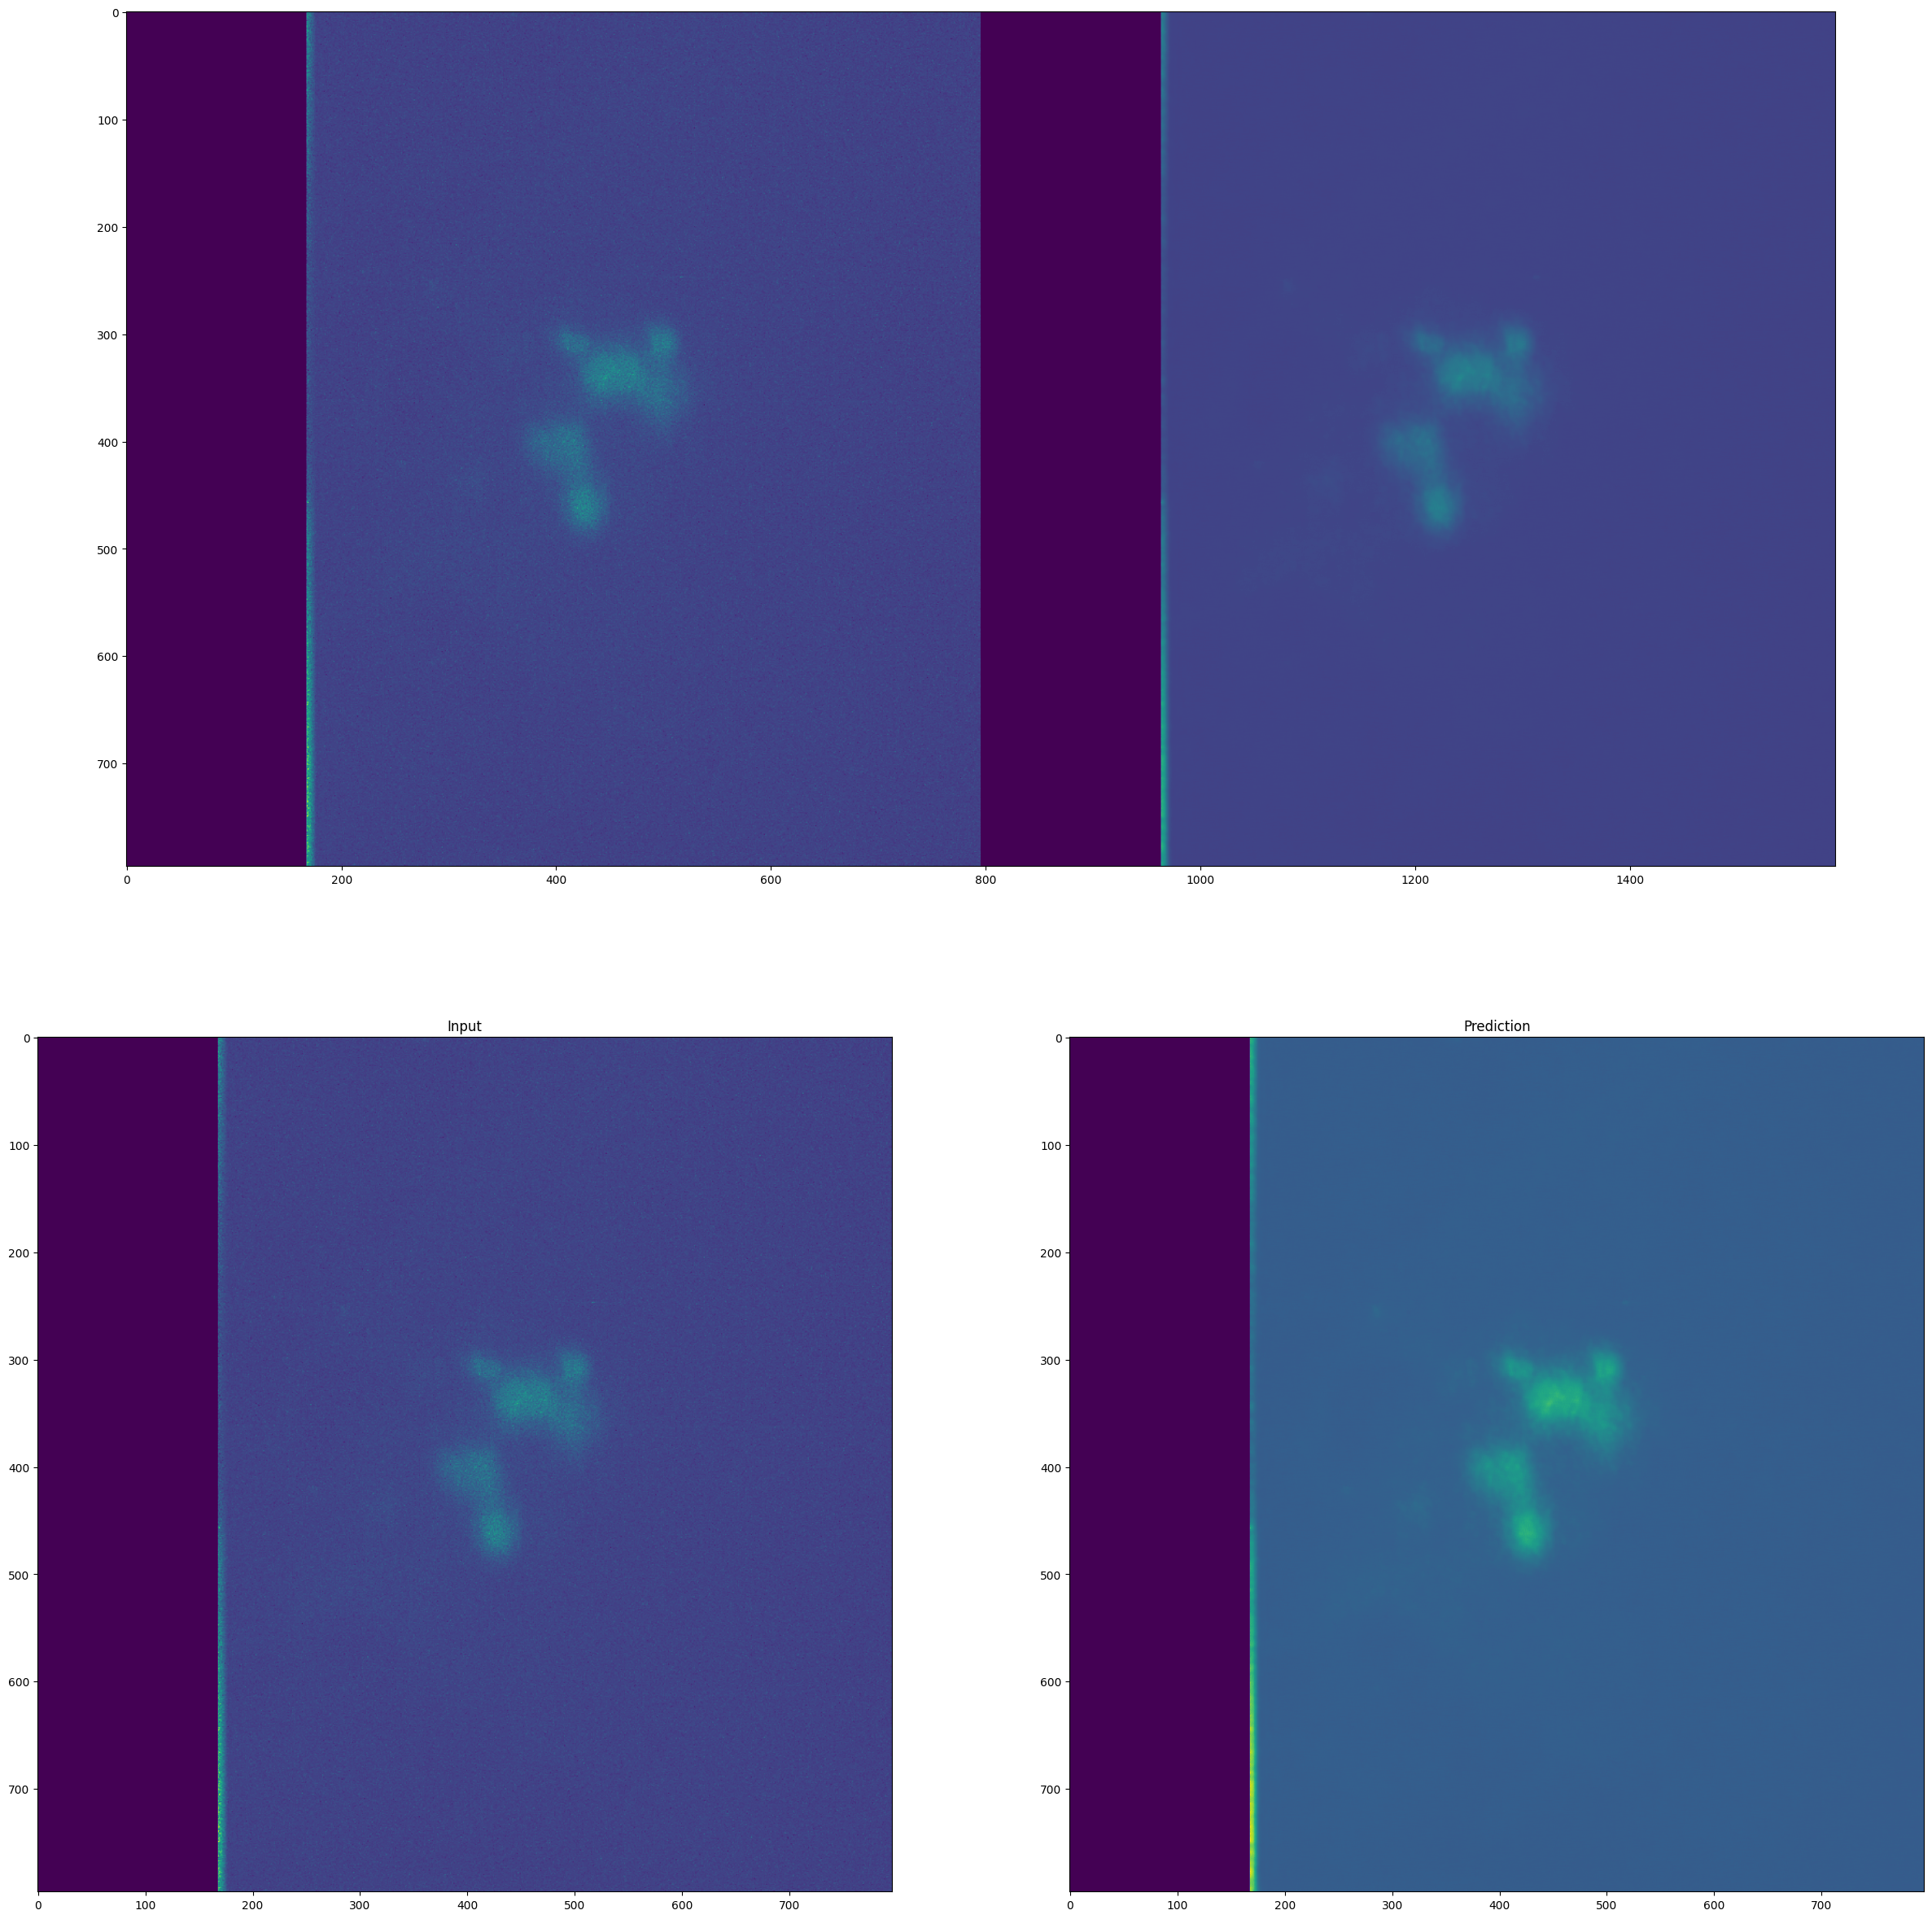

In [35]:
# Here we process the image.
image = img[0][0, 70, :, :, 0]

non_zero_cols = np.any(image != 0, axis = 0)
first_non_zero_col = np.argmax(non_zero_cols)
last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
clean_image = image[:, first_non_zero_col:last_non_zero_col + 1]

pred = model.predict(clean_image, axes='YX')

full_pred = np.zeros_like(image)

full_pred[:, first_non_zero_col:last_non_zero_col + 1] = pred

plt.figure(figsize=(30,30))


plt.subplot(2,1,1)
plt.imshow(np.hstack((image, full_pred)))

# We show the noisy input...
plt.subplot(2,2,3)
plt.imshow( image )
plt.title('Input');

# and the result.
plt.subplot(2,2,4)
plt.imshow( full_pred )
plt.title('Prediction');

In [45]:
d3_pred = []

for image in img[0][0]:
    image = image[:, :, 0]
    # print(image.shape)

    non_zero_cols = np.any(image != 0, axis = 0)
    first_non_zero_col = np.argmax(non_zero_cols)
    last_non_zero_col = len(non_zero_cols) - np.argmax(non_zero_cols[::-1]) - 1
    clean_image = image[:, first_non_zero_col:last_non_zero_col + 1]

    pred = model.predict(clean_image, axes='YX')

    full_pred = np.zeros_like(image)

    full_pred[:, first_non_zero_col:last_non_zero_col + 1] = pred
    
    d3_pred.append(full_pred)

1/1 [==============================] - 2s 2s/step


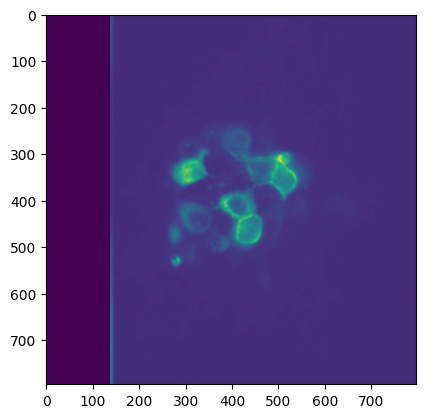

In [48]:
d3_pred = np.array(d3_pred)
plt.imshow(d3_pred[100])

In [50]:
save_tiff_imagej_compatible('./../domes/Dome103_processed_n2v2d.tif', d3_pred, axes='ZYX')